 # FACE MASK DETECTION - REAL TIME TRACKER

## [SL]ackathon Challenge 2022

Since the viral outbreak of SARS COVID-2, many businesses and hospitals have struggled to contain the spread of the pandemic due to the polarizing opinion on the efficacy of mask-wearing. Ensuring individuals are masked can be a cumbersome process for hospital staff and other businesses, inevitably resulting in relaxed policies in which individuals may not comply or even remove their masks after a given checkpoint. To strengthen mask-wearing regulations, businesses can include additional preventative measures that does not require hospital staff to ensure mask-policy is followed. Businesses can use this face mask detection algorithm and using Arduino pair it with a camera and alarming system that can alert authorities when an individual is not complying with policy. This would ease the strain on employees to maintain mask regulations.

**Primary locations where this detection system can be utilized:**
- Transit Hubs - Passengers can be restricted from entering a certain zone without a face mask as to avoid the spread.
- Healthcare centers - Will ensure the safety of healthcare workers if all patients, visitors, and hospital staff by declaring when an individual cannot enter any specified area without wearing a mask

Limitations with the model include alternative network architecture, that could perform better in mask detection tasks. The model suffers limitations due to large dataset performance. Another limitation comes with the irregularities in the images, insufficient light and side anglAchieving high accuracy in the least possible time will be a key goal for this model.

## 1. Import Libraries and Loading Dataset

In [212]:
#IMPORTING LIBRARIES


import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import os

In [129]:
img_array = cv2.imread("/Users/Dishant/Documents/DATA SCIENCE/Machine Learning Projects/Face Mask Real-Time Detector/Face Mask Dataset/Masks/00000_Mask.jpg")
RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

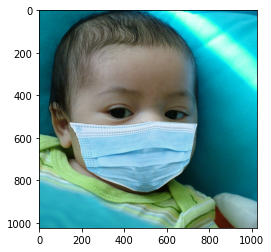

In [130]:
plt.imshow(RGB_img)

In [132]:
img_array.shape

(1024, 1024, 3)

## 2. Read Images and Convert them to Number Arrays for Neural Network

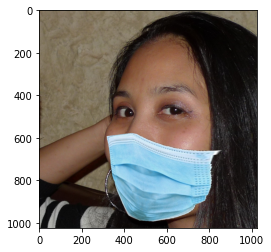

In [136]:
#CREATING A CATEGORY OF CLASSES AND IMPORTING THE FACE MASKED AND UNMASKED IMAGES INTO THOSE CLASSES

main_dir = '/Users/Dishant/Documents/DATA SCIENCE/Machine Learning Projects/Face Mask Real-Time Detector/Face Mask Dataset'
Classes = ['Masks','No Masks']

for category in Classes:
    path = os.path.join(main_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

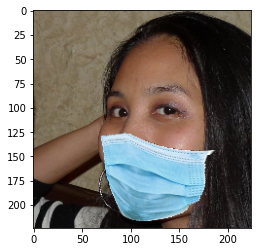

In [138]:
#RESIZING IMAGE TO (IMAGE_NET 224x224)
img_size = 224

new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [141]:
training_Data = [] #creating empty dataset

def create_training_Data():
    for category in Classes:
        path = os.path.join(main_dir, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [142]:
#RUN FUNCTION TO CREATE DATASET

create_training_Data()

In [143]:
print(len(training_Data))

1878


In [145]:
import random #Randomize dataset to reduce chances of biased model

random.shuffle(training_Data)

In [248]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size,img_size, 3)
X.shape

(1878, 224, 224, 3)

In [249]:
Y = np.array(y)

In [250]:
Y

array([0, 0, 0, ..., 1, 0, 0])

In [251]:
import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(Y,pickle_out)
pickle_out.close()

In [252]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle', 'rb')
Y = pickle.load(pickle_in)

## 3. Create Deep Learning Model for Face Mask Detection - Transfer Learning

In [253]:
model = tf.keras.applications.mobilenet.MobileNet() #pre-trained model

In [254]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [255]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [256]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [257]:
updated_model = keras.Model(inputs = base_input, outputs = final_output)

In [258]:
updated_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

**Establish elements for binary classification in this case for face mask or no face mask.**

In [259]:
updated_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [260]:
updated_model.fit(X,Y,epochs = 1, validation_split = 0.1)

53/53 [==============================] - 316s 6s/step - loss: 0.0935 - accuracy: 0.9692 - val_loss: 0.3025 - val_accuracy: 0.9362


In [261]:
updated_model.save('face_mask_detector.h5')

In [262]:
MODEL = tf.keras.models.load_model('face_mask_detector.h5')

## 4. Utilize the model and check against unseen images.

In [275]:
frame = cv2.imread('/Users/Dishant/Documents/DATA SCIENCE/Machine Learning Projects/Face Mask Real-Time Detector/Face Mask Dataset/No Masks/00090_Mask_Chin.jpg')

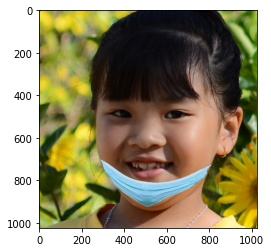

In [276]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [277]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255

In [278]:
Predictions = updated_model.predict(final_image)

1/1 [==============================] - 0s 44ms/step


In [279]:
Predictions

array([[0.00110818]], dtype=float32)

In [268]:
frame = cv2.imread('/Users/Dishant/Documents/DATA SCIENCE/Machine Learning Projects/Face Mask Real-Time Detector/Face Mask Dataset/Masks/00013_Mask.jpg')

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

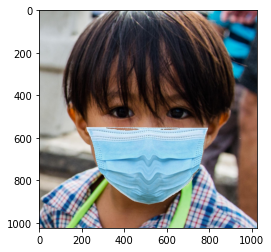

In [269]:
plt.imshow(cv2.cvtColor(frame ,cv2.COLOR_BGR2RGB))

In [270]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [271]:
gray.shape


(1024, 1024)

In [272]:
faces = faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = frame[y:y+h , x:x+h]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print('Face Not Detected')
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

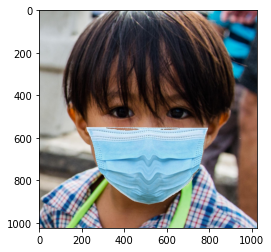

In [273]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [274]:
#check model predictions against the image of the "SAD WOMAN"
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255

Predictions = MODEL.predict(final_image)
Predictions

1/1 [==============================] - 1s 947ms/step


array([[0.00092108]], dtype=float32)

## 5. Real-Time Video Demo

In [197]:
import cv2

path = 'haarcacade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#set the rectangle background to white
rectangle_back = (255,255,255)
#make a black image
img = np.zeros((500,500))
#set some text
text = 'Some text in a box!'
#get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, font_scale, thickness = 1)[0]
#set the text start position
text_offset_x = 10
text_offset_y = img.shape[0]-25

box_coords = (text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2)
cv2.rectangle(img,box_coords[0], box_coords[1], rectangle_back, cv2.FILLED)
cv2.putText(img, text, (text_offset_x,text_offset_y), font ,fontScale = font_scale, color = (0,0,0), thickness = 1)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [198]:
cap = cv2.VideoCapture(0)

In [199]:
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = frame[y:y+h , x:x+h]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print('Face Not Detected')
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew] #cropping the face to see if mask is being worn or not
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis =0)
    final_image = final_image/255

    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = MODEL.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (Predictions  > 0.8):
        status = 'No Mask'
        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        #add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), font, 0.7, (0,0, 255), 2)
        cv2.putText(frame, status,(100,150), font,3,(0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    else:
        status = 'Face Mask'
        x1,y1,w1,h1 = 0,0,175,75

        cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0,0,0), -1)
        #add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        cv2.putText(frame, status,(100,150), font,3,(0,255,0), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))

        cv2.imshow('Face Mask Detection Tutorial', frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows

1/1 [==============================] - 0s 98ms/step
Face Not Detected
1/1 [==============================] - 0s 130ms/step
Face Not Detected
1/1 [==============================] - 0s 98ms/step
Face Not Detected
1/1 [==============================] - 0s 79ms/step
Face Not Detected
1/1 [==============================] - 0s 97ms/step
Face Not Detected
1/1 [==============================] - 0s 47ms/step
Face Not Detected
1/1 [==============================] - 0s 52ms/step
Face Not Detected
1/1 [==============================] - 0s 86ms/step
Face Not Detected
1/1 [==============================] - 0s 80ms/step
Face Not Detected
1/1 [==============================] - 0s 50ms/step
Face Not Detected
1/1 [==============================] - 0s 44ms/step
Face Not Detected
1/1 [==============================] - 0s 50ms/step
Face Not Detected
1/1 [==============================] - 0s 50ms/step
Face Not Detected
1/1 [==============================] - 0s 51ms/step
Face Not Detected
1/1 [==============

KeyboardInterrupt: 